In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import tensorflow.keras as keras
import model_api as api
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
# This is CPU tensorflow if 0 GPUs


Num GPUs Available:  0


In [2]:
x_train, y_train, x_test, y_test = api.get_standard_data()    

In [3]:
# Analyze shape of inputs
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("\nShape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

'''
The category labels are sparsely labeled instead of using a one-hot vector.
This will be accounted for in the design on the neural network optimizer. 
'''

Shape of x_train:  (60000, 28, 28)
Shape of y_train:  (60000,)

Shape of x_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


'\nThe category labels are sparsely labeled instead of using a one-hot vector.\nThis will be accounted for in the design on the neural network optimizer. \n'

In [4]:
def train_model(model, x_train, y_train, x_test, y_test, epochs=100, val_split=0.1):
    # Train the neural network model 
    # Include validation split (optional)... this is outside the test_set!
    # We may use this for K-crossfold validation if we want to really test a model
    train_hist = model.fit(x=x_train, y=y_train, validation_split=val_split, epochs=epochs)
    test_result = model.evaluate(x=x_test, y=y_test)

    return train_hist, test_result

mlp_params = [[16, 2], [32, 2]]
cnn_params = [[16, 1], [16, 2], [16, 4]] 
epochs=100

In [5]:
# Plot loss history
import matplotlib.pyplot as plt
import seaborn as sns

def show_results(train_hist, test_result, model_name="model"):
    loss_hist = train_hist.history['loss']
    val_loss_hist = train_hist.history['val_loss']
    acc_hist = train_hist.history['accuracy']
    val_acc_hist = train_hist.history['val_accuracy']

    plt.plot(loss_hist, label="Training Loss")
    plt.plot(val_loss_hist, label="Validation Loss")
    plt.title(f"Categorical Cross Entropy Loss History of {model_name}.")
    plt.legend()
    plt.show()
    plt.savefig("Figures/" + model_name + "/loss")

    plt.plot(acc_hist, label="Training Accuracy")
    plt.plot(val_acc_hist, label="Validation Accuracy")
    plt.title(f"Accuracy History of {model_name} on Training Set.")
    plt.legend()
    plt.show()
    plt.savefig("Figures/" + model_name + "/accuracy")

    print(f"Categorical Cross Entropy Loss of {model_name} on Test Set: ", test_result[0])
    print(f"Accuracy of {model_name} on Test Set: ", test_result[1])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 51450 (200.98 KB)
Trainable params: 51450 (200.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100


1688/168

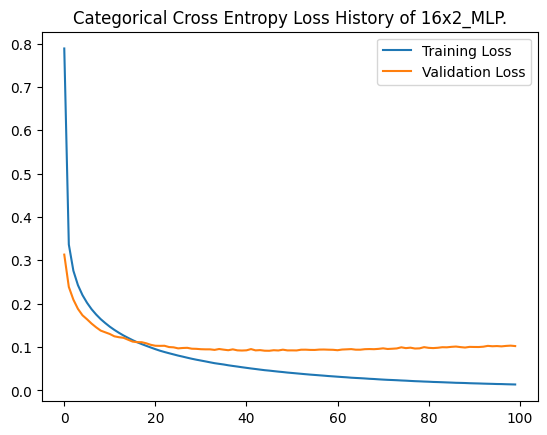

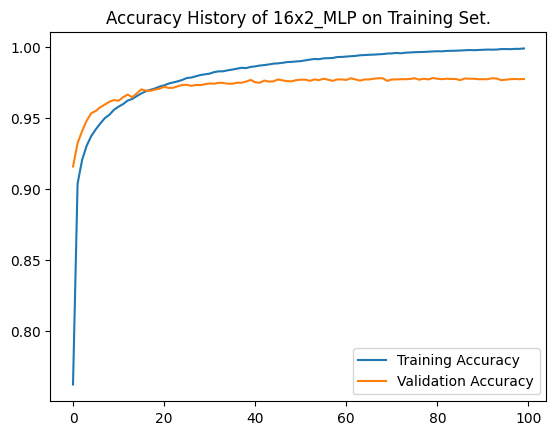

Categorical Cross Entropy Loss of 16x2_MLP on Test Set:  0.1058853417634964
Accuracy of 16x2_MLP on Test Set:  0.9711999893188477
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.

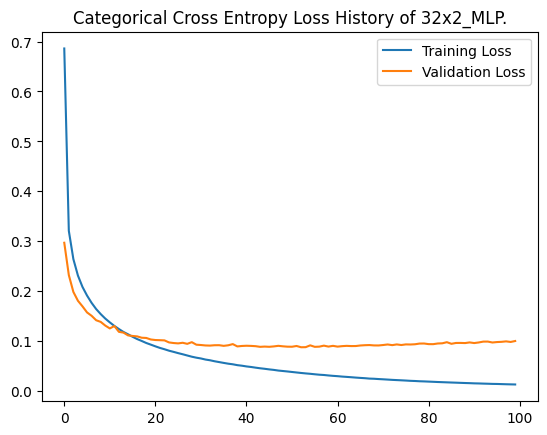

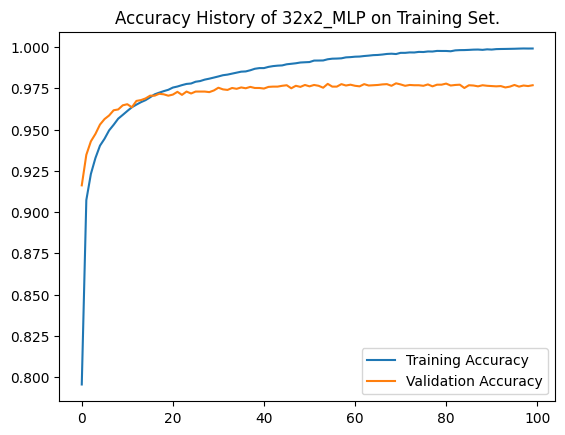

Categorical Cross Entropy Loss of 32x2_MLP on Test Set:  0.10725961625576019
Accuracy of 32x2_MLP on Test Set:  0.972100019454956


<Figure size 640x480 with 0 Axes>

In [6]:
# Initialize Neural Network
for params in mlp_params:
    filters = params[0]
    layers = params[1]
    
    NN_model = api.NN_classifier(filters, layers, verbose=True) # Use API for standard MLP

    # Train Model
    train_hist, test_result = train_model(NN_model, x_train, y_train , x_test, y_test, epochs=epochs, val_split=0.1)

    # Display Training and Validation Charts
    show_results(train_hist, test_result, model_name=f"{filters}x{layers}_MLP")

    # Save Model
    dir = f"Models/MLP/{filters}x{layers}_MLP.keras"
    NN_model.save(dir) 
    


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

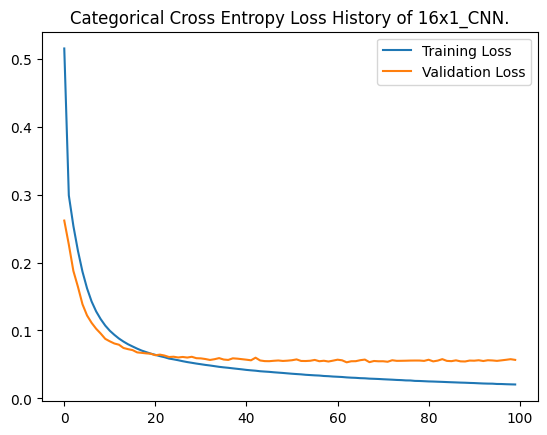

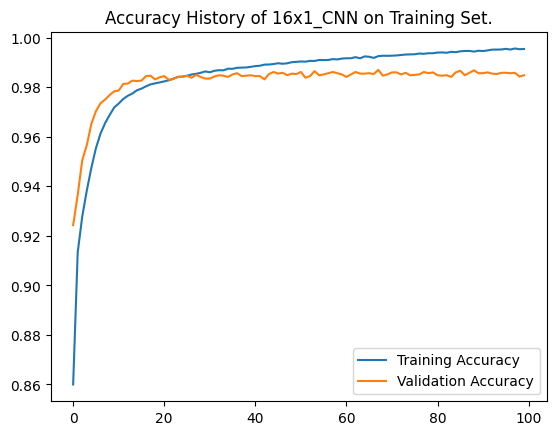

Categorical Cross Entropy Loss of 16x1_CNN on Test Set:  0.05450668931007385
Accuracy of 16x1_CNN on Test Set:  0.9836999773979187
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 16)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                            

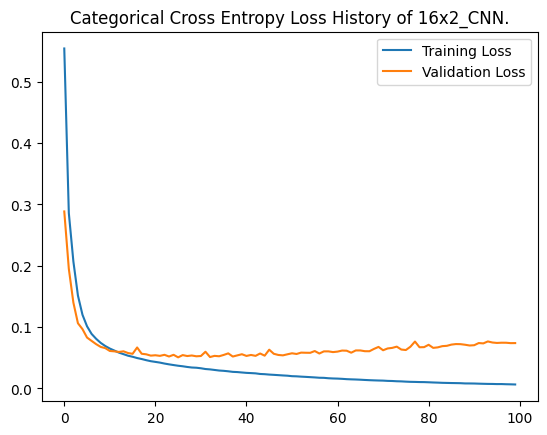

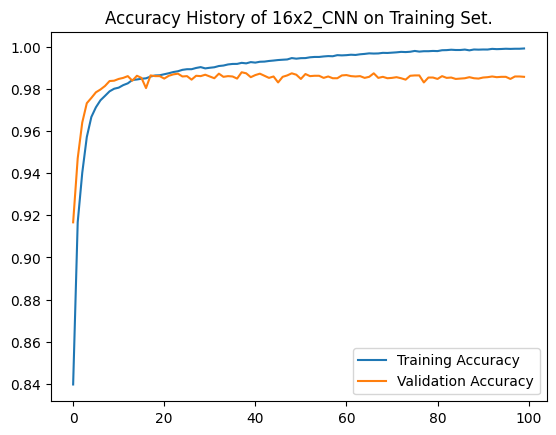

Categorical Cross Entropy Loss of 16x2_CNN on Test Set:  0.06588789075613022
Accuracy of 16x2_CNN on Test Set:  0.9847999811172485
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 16)        2320      
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 16)        0    

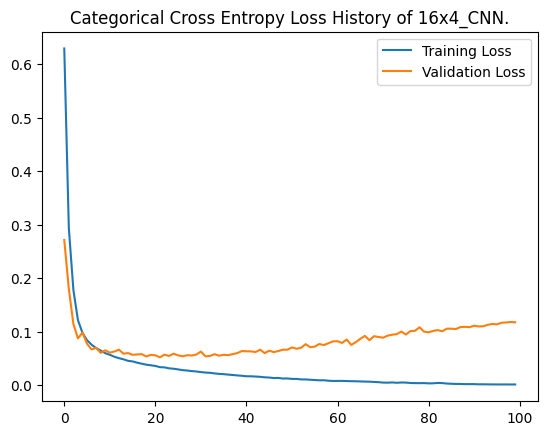

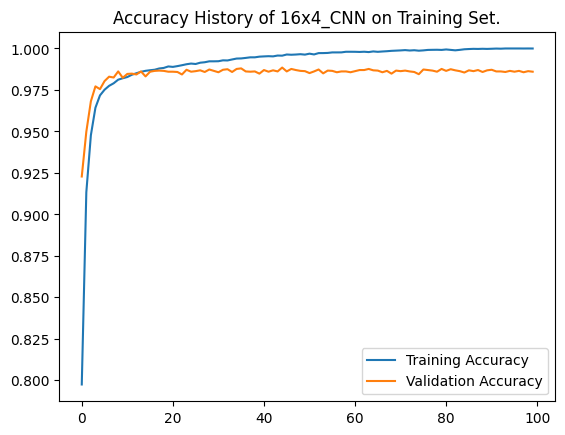

Categorical Cross Entropy Loss of 16x4_CNN on Test Set:  0.08556618541479111
Accuracy of 16x4_CNN on Test Set:  0.9866999983787537


<Figure size 640x480 with 0 Axes>

In [7]:
# Initialize Neural Network
for params in cnn_params:
    filters = params[0]
    layers = params[1]
    
    CNN_model = api.CNN_classifier(filters, layers, verbose=True) # Use API for standard MLP

    # Train Model
    train_hist, test_result = train_model(CNN_model, x_train, y_train , x_test, y_test, epochs=epochs, val_split=0.1)

    # Display Training and Validation Charts
    show_results(train_hist, test_result, model_name=f"{filters}x{layers}_CNN")

    # Save Model
    dir = f"Models/CNN/{filters}x{layers}_CNN.keras"
    NN_model.save(dir) 
    